In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.describe()

count     236963
unique    216480
top       Hamlet
freq          20
Name: title, dtype: object

In [7]:
#Hamlet is the top most frequent value. 20 movies.

### Which three years of the 1930s saw the most films released?

In [12]:
thirties = titles[titles.year.between(1930,1940,inclusive = True)]

In [41]:
thirties.year.value_counts()

1937    1200
1936    1138
1938    1135
1939    1086
1935    1057
1940    1003
1934     977
1932     941
1933     900
1931     884
1930     824
Name: year, dtype: int64

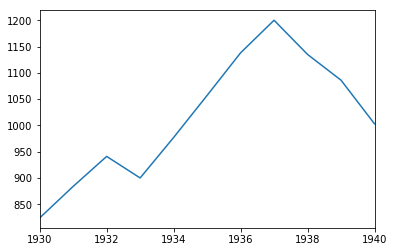

In [40]:
thirties.year.value_counts().sort_index().plot()

### Plot the number of films that have been released each decade over the history of cinema.

In [22]:
filmsbydecade = titles

In [50]:
filmsbydecade.year = filmsbydecade.year//10*10

In [56]:
filmbydec = filmsbydecade.year.value_counts().sort_index()

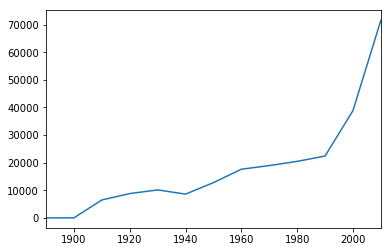

In [71]:
filmbydec[0:-2].plot()

### Plot the number of "Hamlet" films made each decade.

In [76]:
hambydec = filmsbydecade[filmsbydecade.title.str.startswith("Hamlet")]

In [78]:
hambydec.head(10)

,title,year
6120,Hamlet,1940
7823,Hamlet: Prince of Denmark,1980
8749,Hamlet (II),2000
9046,Hamlet (II),2010
9181,Hamlet. Comedy,2010
15466,Hamlet Unbound,2010
15486,Hamlet: The Fall of a Sparrow,2010
17735,"Hamlet, Prince of Denmark",1990
30514,Hamlet (II),2010
37876,Hamlet_X,2000


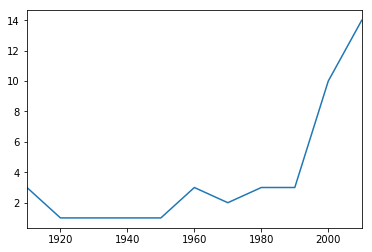

In [87]:
hambydec.year.value_counts().sort_index().plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

In [88]:
rustler = cast[cast.character == "Rustler"]

In [92]:
rustler.year = rustler.year //10*10

In [97]:
rustler = rustler.sort_values('year')
rustler

,title,year,name,type,character,n
167062,Arizona Days,1920,Hank Bell,actor,Rustler,NaN
304223,Border Romance,1920,Fred Burns,actor,Rustler,NaN
1434144,Border Romance,1920,Jim Mason,actor,Rustler,NaN
1488549,The Virginian,1920,Lew Meehan,actor,Rustler,NaN
120744,Border Romance,1920,Chuck Baldra,actor,Rustler,NaN
401347,Trail of the Horse Thieves,1920,Ray Childs,actor,Rustler,8.0
44517,The Last Stand,1930,Gene Alsace,actor,Rustler,NaN
95443,Silent Valley,1930,Jimmy Aubrey,actor,Rustler,NaN
2393116,The Westerner,1930,Slim Whitaker,actor,Rustler,NaN
2392958,Prescott Kid,1930,Slim Whitaker,actor,Rustler,NaN


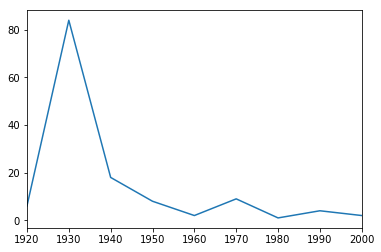

In [104]:
rustler.year.value_counts().sort_index().plot()

### Plot the number of "Hamlet" characters each decade.

In [108]:
hamletchar.year = hamletchar.year//10*10

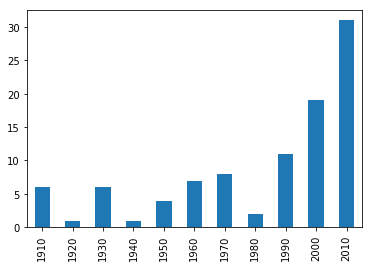

In [117]:
hamletchar.year.value_counts().sort_index().plot(kind="bar")

### What are the 11 most common character names in movie history?

In [119]:
charnames = cast["character"]

In [121]:
charnames.value_counts()

Himself                                    20376
Dancer                                     12148
Extra                                      11303
Reporter                                    8256
Doctor                                      7527
Student                                     7384
Policeman                                   6950
Party Guest                                 6901
Nurse                                       6767
Bartender                                   6709
Herself                                     6426
Minor Role                                  6272
Zombie                                      6110
Townsman                                    5649
Waiter                                      5333
Henchman                                    5024
Bar Patron                                  4746
Soldier                                     4687
Police Officer                              4650
Waitress                                    4633
Detective           

### Who are the 10 people most often credited as "Herself" in film history?

In [122]:
herself = cast[cast["character"] == "Herself"]

In [125]:
herself.name.value_counts()

Queen Elizabeth II                  11
Laura (II) M?gica                    9
Margaret Thatcher                    9
Joyce Brothers                       9
Marta Berrocal                       8
In?s J. Southern                     8
Estrella Borja                       8
Marina Revilla                       7
Elena Santisteban                    7
Mary Jo Pehl                         7
Hillary Clinton                      7
Natalia Cociu                        6
Andrea Urresti                       6
Mar?a Luisa (V) Mart?n               6
Joan Rivers                          6
Alejandra Torre                      6
Luisa Horga                          6
Zoe Ortiz de Z?rate                  6
?ngela Silv?n                        6
Marilyn Monroe                       6
Elsa Guerrero                        6
Sumie Sakai                          6
Aleiska von Lippke                   5
Bunny Yeager                         5
Cristina Cubas                       5
Mar?a Isabel (III) Mart?n

### Who are the 10 people most often credited as "Himself" in film history?

In [126]:
himself = cast[cast["character"] == "Himself"]

In [127]:
himself.name.value_counts()

Adolf Hitler                      100
Richard Nixon                      47
Ronald Reagan                      41
John F. Kennedy                    37
Ron Jeremy                         23
Winston Churchill                  23
George W. Bush                     23
Martin Luther King                 22
Benito Mussolini                   22
Bill Clinton                       22
Franklin D. Roosevelt              20
Muhammad Ali                       19
Manuel Valent?n-Fdez.              18
Joseph Stalin                      18
Diego Aramburu-Zabala              16
Barack Obama                       16
Lloyd Kaufman                      16
Billy Graham                       15
Miguel Cuesta                      15
Abraham Torres                     15
Lyndon Johnson                     15
Jimmy Carter                       14
Fidel Castro                       13
Amitabh Bachchan                   13
Cayetano Guerra                    13
Bill Corbett                       12
John Lennon 

### Which actors or actresses appeared in the most movies in the year 1945?

In [128]:
year1945 = cast[cast.year == 1945]

In [138]:
year1945.name.value_counts()

Emmett Vogan                 39
Sam (II) Harris              32
Bess Flowers                 29
Harold Miller                29
Frank O'Connor               27
Nolan Leary                  27
Franklyn Farnum              26
Larry Steers                 25
Charles Sullivan             24
Edmund Cobb                  24
Pierre Watkin                24
Herman Hack                  24
Tom London                   24
Bud Osborne                  23
Addison Richards             23
Horace B. Carpenter          23
Kenner G. Kemp               23
Budd Buster                  22
Arthur Loft                  22
Jack Ingram                  22
Lee Phelps                   22
Chester Clute                22
Byron Foulger                22
James Conaty                 21
Al Ferguson                  21
Edward Gargan                21
Jack O'Shea                  21
Rex Lease                    21
Eddie Acuff                  20
James Flavin                 20
                             ..
Scott Sa

### Which actors or actresses appeared in the most movies in the year 1985?

In [141]:
year1985 = cast[cast.year == 1985]

In [154]:
year1985.name.value_counts()

Mammootty                      22
Shakti Kapoor                  21
Sukumari                       20
Aruna Irani                    15
Raj Babbar                     15
Mohanlal                       15
Lou Scheimer                   15
Deven Verma                    13
Asrani                         13
Rajesh Khanna                  13
Om Shivpuri                    13
Innocent Vareed Thekkethala    12
Thilakan                       12
Satyendra Kapoor               12
Jagdish Raj                    12
Pinchoo Kapoor                 12
Yunus Parvez                   11
Danny Denzongpa                11
Nedumudi Venu                  10
Madan Puri                     10
Mithun Chakraborty             10
Kader Khan                     10
Iftekhar                       10
Jagathi Sreekumar              10
Sharat Saxena                  10
Kulbhushan Kharbanda           10
Shobana                        10
Rati Agnihotri                 10
Huma Khan                       9
Pat (II) Frale

### Plot how many roles Mammootty has played in each year of his career.

In [155]:
mammootty = cast[cast.name == "Mammootty"]

In [166]:
mammootty.character.count()

278

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [167]:
patron = cast[cast.character.str.startswith("Patron in")]

In [170]:
patron.character.value_counts()

Patron in Frisky Rabbit           16
Patron in Chinese Restaurant       9
Patron in the Coffee House         9
Patron in Billiard Parlor          5
Patron in Restaurant               4
Patron in restaurant               4
Patron in Bar                      4
Patron in cabaret                  3
Patron in Club                     3
Patron in Coffee Shop              2
Patron in Audience                 2
Patron in Quiet Bar                2
Patron in booth                    2
Patron in Pizza Place              1
Patron in Diner                    1
Patron in Children's Nightclub     1
Patron in Art Gallery              1
Patron in Cinema                   1
Patron in Hall #1                  1
Patron in airport                  1
Patron in Strip Club               1
Patron in Hooly's                  1
Patron in Bookstore                1
Patron in Pool Hall                1
Patron in Black                    1
Patron in Macy's Lunchroom         1
Patron in Night Club               1
P

### What are the 10 most frequent roles that start with the word "Science"?

In [171]:
science = cast[cast.character.str.startswith("Science")]

In [172]:
science.character.value_counts()

Science Teacher              60
Science Student               9
Science Fair Student          9
Science Fair Judge            6
Science Promo Cadet           5
Science Club Member           5
Science Kid                   5
Science Reporter              5
Science                       4
Science Fair Kid              3
Science Fair Teacher          3
Science Officer               3
Science teacher               3
Science Guy                   2
Science Class Student         2
Science Fair Crowd Member     2
Science Kid #1                2
Science Team Member           2
Science Monk                  1
Science Lab Guard 2           1
Science Museum Guest          1
Science Fair Boy              1
Science Performer 2           1
Science Performer 3           1
Science Tech #3               1
Science Tech #2               1
Science Apprentice            1
Science School Teacher        1
Science Officer 0718          1
Science Woman                 1
                             ..
Science 

### Plot the n-values of the roles that Judi Dench has played over her career.

In [173]:
judiplot = cast[(cast.name == "Judi Dench")]

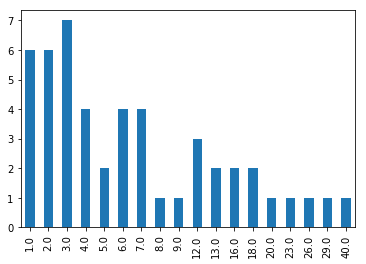

In [190]:
judiplot.n.value_counts().sort_index().plot(kind = "bar")

### Plot the n-values of Cary Grant's roles through his career.

In [191]:
caryplot = cast[(cast.name == "Cary Grant")]

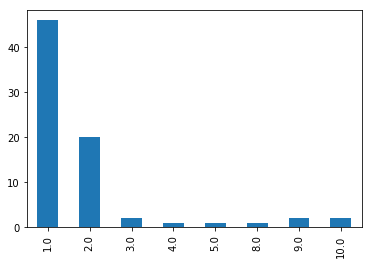

In [192]:
caryplot.n.value_counts().sort_index().plot(kind = "bar")

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [193]:
sidneyplot = cast[(cast.name == "Sidney Poitier")]

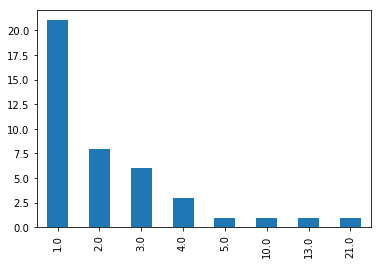

In [200]:
sidneyplot.n.value_counts().sort_index().plot(x = "n-value",y = "# of roles",kind = "bar")

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [201]:
lead50s = cast[(cast.year.between(1950,1959)) & (cast.n == 1)]

In [205]:
lead50s.character.count()

9650

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [206]:
support50s = cast[(cast.year.between(1950,1959)) & (cast.n == 2)]

In [207]:
support50s.character.count()

9185